<a href="https://www.kaggle.com/code/rohansinghjadoan/notebookac9d377220?scriptVersionId=272712293" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-final-grade-prediction-multi-lin-reg/student-mat.csv


In [2]:
import pandas as pd

df=pd.read_csv('/kaggle/input/student-final-grade-prediction-multi-lin-reg/student-mat.csv')

In [3]:
df.head()

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## First step for these many columns dataset is understanding the data 


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   school                    395 non-null    object
 1   sex                       395 non-null    object
 2   age                       395 non-null    int64 
 3   address                   395 non-null    object
 4   famsize                   395 non-null    object
 5   Parrent_status            395 non-null    object
 6   Mother_edu                395 non-null    int64 
 7   Father_edu                395 non-null    int64 
 8   Mother_job                395 non-null    object
 9   Father_job                395 non-null    object
 10  reason_to_chose_school    395 non-null    object
 11  guardian                  395 non-null    object
 12  traveltime                395 non-null    int64 
 13  weekly_studytime          395 non-null    int64 
 14  failures                  

In [5]:
df.isnull().sum()

school                      0
sex                         0
age                         0
address                     0
famsize                     0
Parrent_status              0
Mother_edu                  0
Father_edu                  0
Mother_job                  0
Father_job                  0
reason_to_chose_school      0
guardian                    0
traveltime                  0
weekly_studytime            0
failures                    0
extra_edu_supp              0
family_edu_supp             0
extra_paid_class            0
extra_curr_activities       0
nursery                     0
Interested_in_higher_edu    0
internet_access             0
romantic_relationship       0
Family_quality_reln         0
freetime_after_school       0
goout_with_friends          0
workday_alcohol_consum      0
weekend_alcohol_consum      0
health_status               0
absences                    0
G1                          0
G2                          0
G3                          0
dtype: int

In [6]:
df.describe()

,age,Mother_edu,Father_edu,traveltime,weekly_studytime,failures,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
df.drop(columns=[ "reason_to_chose_school", "Interested_in_higher_edu", "Family_quality_reln", "nursery"])


,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,romantic_relationship,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,1,3,4,5,0,11,12,10


### as i can see this data set i think filnal grades are important 

# !pip install tensorflow==2.17.0 scikeras==0.12.0 scikit-learn==1.5.1 --quiet --force-reinstall
NOW USE LABLE ENCODING

In [8]:
from sklearn.preprocessing import LabelEncoder
df_le=df.copy()
le=LabelEncoder()
for col in df_le.columns:
    if df_le[col].dtype=='object':
        df_le[col]=le.fit_transform(df_le[col])
    

In [9]:
df.head()


,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
df_le.head()

,school,sex,age,address,famsize,Parrent_status,Mother_edu,Father_edu,Mother_job,Father_job,...,Family_quality_reln,freetime_after_school,goout_with_friends,workday_alcohol_consum,weekend_alcohol_consum,health_status,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [11]:
X=df_le.drop('G3',axis=1)
y=df_le['G3']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


from tensorflow.keras.optimizers import Adam

2025-11-01 21:07:14.748430: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762031235.014667      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762031235.094680      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# ANN architecture
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1],kernel_initializer='he_normal'),
    Dropout(0.3),
    Dense(32, activation='relu',kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(16, activation='relu',kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(8, activation='relu',kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(1)  # regression output (no activation)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=16, verbose=1)


Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-01 21:07:29.547665: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 82.9930 - mae: 8.0491 - val_loss: 36.9923 - val_mae: 5.2629
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.7237 - mae: 6.0702 - val_loss: 24.2762 - val_mae: 4.1072
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46.8978 - mae: 5.5467 - val_loss: 22.5167 - val_mae: 4.0854
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44.6474 - mae: 5.4432 - val_loss: 20.9063 - val_mae: 3.9922
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 46.9797 - mae: 5.4971 - val_loss: 18.3782 - val_mae: 3.7058
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 35.4852 - mae: 4.6728 - val_loss: 16.0291 - val_mae: 3.4130
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38.9842 - mae: 5.1946 - val_loss: 18.7930 - val_mae: 3.8575
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.0126 - mae: 4.8046 - val_loss: 15.0161 - val_mae: 3.3493
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

In [16]:
y_pred = model.predict(X_test).flatten()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 1.93
MSE: 6.98
RMSE: 2.64
R²: 0.66


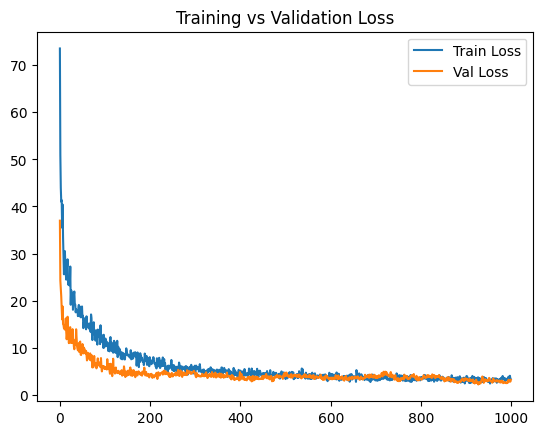

In [18]:

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()
